## sklearn.metrics.precision_score
* sklearn.metrics.precision_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1825)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score "Permalink to this definition")

## sklearn.metrics.recall_score

* sklearn.metrics.recall_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1967)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score "Permalink to this definition")

## sklearn.metrics.f1_score

* sklearn.metrics.f1_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1011)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score "Permalink to this definition")

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 깔끔하게 보이는 효과
%matplotlib inline

# Warning 무시
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
# 7.titanic ML에서 만든 함수 가져오기

# Null 처리 함수
def fillna_1(df) :
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)

    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

    return df

# 레이블 인코딩 수행
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df) :
    df = fillna_1(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1Score = f1_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    # print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1Score : {f1_score:.4f}'.format(accuracy, precision, recall, f1_score))
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, f1Score : {f1Score:.4f}')

In [59]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./datasets/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1Score : 0.7805


In [61]:
lr_pred_proba = lr_clf.predict_proba(X_test)

In [62]:
lr_pred_proba

array([[0.46174518, 0.53825482],
       [0.87863674, 0.12136326],
       [0.877169  , 0.122831  ],
       [0.88269448, 0.11730552],
       [0.85527328, 0.14472672],
       [0.88225796, 0.11774204],
       [0.8883857 , 0.1116143 ],
       [0.20883193, 0.79116807],
       [0.78289603, 0.21710397],
       [0.36937528, 0.63062472],
       [0.89982884, 0.10017116],
       [0.87496895, 0.12503105],
       [0.87716297, 0.12283703],
       [0.88833936, 0.11166064],
       [0.43648346, 0.56351654],
       [0.85893176, 0.14106824],
       [0.90373191, 0.09626809],
       [0.73344545, 0.26655455],
       [0.72478461, 0.27521539],
       [0.17180968, 0.82819032],
       [0.7536279 , 0.2463721 ],
       [0.61929775, 0.38070225],
       [0.8545664 , 0.1454336 ],
       [0.81484913, 0.18515087],
       [0.88796516, 0.11203484],
       [0.7655459 , 0.2344541 ],
       [0.85969246, 0.14030754],
       [0.92585665, 0.07414335],
       [0.7196165 , 0.2803835 ],
       [0.69551089, 0.30448911],
       [0.

In [63]:
lr_pred_proba[:,1]

array([0.53825482, 0.12136326, 0.122831  , 0.11730552, 0.14472672,
       0.11774204, 0.1116143 , 0.79116807, 0.21710397, 0.63062472,
       0.10017116, 0.12503105, 0.12283703, 0.11166064, 0.56351654,
       0.14106824, 0.09626809, 0.26655455, 0.27521539, 0.82819032,
       0.2463721 , 0.38070225, 0.1454336 , 0.18515087, 0.11203484,
       0.2344541 , 0.14030754, 0.07414335, 0.2803835 , 0.30448911,
       0.94725392, 0.81743691, 0.12678495, 0.82606149, 0.39929651,
       0.2344541 , 0.07239757, 0.61122048, 0.05294175, 0.10394955,
       0.35050676, 0.08335264, 0.82183903, 0.70772981, 0.63055479,
       0.63057122, 0.91890784, 0.35867093, 0.94885868, 0.1120697 ,
       0.5930048 , 0.11166064, 0.13283704, 0.72521692, 0.3093133 ,
       0.19694884, 0.22626426, 0.12283205, 0.15425977, 0.43218867,
       0.280089  , 0.10078533, 0.54554174, 0.51359969, 0.44419836,
       0.09462753, 0.66696334, 0.59429486, 0.95183549, 0.1480704 ,
       0.12892547, 0.16851115, 0.10395182, 0.94800087, 0.19860

## sklearn.metrics.precision_recall_curve

* sklearn.metrics.precision_recall_curve(_y_true_,  _probas_pred_,  _*_,  _pos_label=None_,  _sample_weight=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_ranking.py#L797)[](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve "Permalink to this definition")

* Returns:

    **precision**
         : ndarray of shape (n_thresholds + 1,)

    - Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

    **recall**
         : ndarray of shape (n_thresholds + 1,)

    - Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

    **thresholds**
         : ndarray of shape (n_thresholds,)

    - Increasing thresholds on the decision function used to compute precision and recall where  `n_thresholds  =  len(np.unique(probas_pred))`.

In [64]:
from sklearn.metrics import precision_recall_curve

data = precision_recall_curve(y_test, lr_pred_proba[:,1])

In [65]:
data

(array([0.34078212, 0.34269663, 0.34463277, 0.34659091, 0.34857143,
        0.35057471, 0.35260116, 0.35465116, 0.35672515, 0.35882353,
        0.36094675, 0.36309524, 0.36526946, 0.36746988, 0.36969697,
        0.37195122, 0.37423313, 0.37654321, 0.37888199, 0.38125   ,
        0.3836478 , 0.38607595, 0.38853503, 0.38461538, 0.38709677,
        0.38961039, 0.38562092, 0.38815789, 0.39333333, 0.39864865,
        0.41549296, 0.42142857, 0.42446043, 0.42753623, 0.43065693,
        0.43382353, 0.43703704, 0.44029851, 0.43609023, 0.43939394,
        0.44274809, 0.44186047, 0.4453125 , 0.4488189 , 0.45238095,
        0.448     , 0.4516129 , 0.44715447, 0.45081967, 0.45454545,
        0.45833333, 0.46218487, 0.46610169, 0.47008547, 0.47413793,
        0.47826087, 0.48245614, 0.48672566, 0.49107143, 0.5       ,
        0.50458716, 0.50925926, 0.51401869, 0.51886792, 0.52380952,
        0.52884615, 0.53398058, 0.53921569, 0.54455446, 0.55      ,
        0.55555556, 0.56122449, 0.56701031, 0.57

Text(0, 0.5, 'probability density')

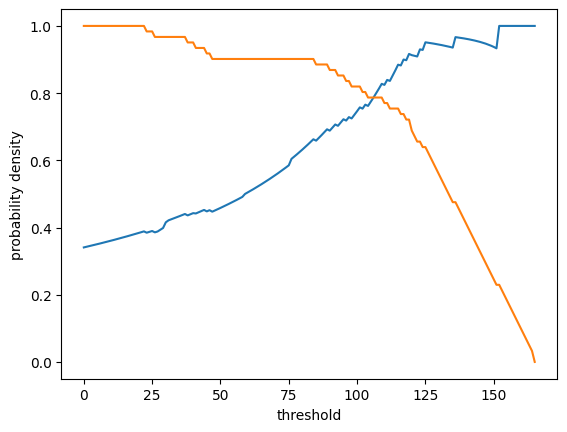

In [66]:
# precision
plt.plot(data[0])
# recall
plt.plot(data[1])

#
plt.xticks()

# 축 이름 설정
plt.xlabel('threshold')
plt.ylabel('probability density')

## sklearn.metrics.roc_curve

* sklearn.metrics.roc_curve(_y_true_,  _y_score_,  _*_,  _pos_label=None_,  _sample_weight=None_,  _drop_intermediate=True_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_ranking.py#L904)[](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve "Permalink to this definition")


* Returns:

	**fpr**
	: ndarray of shape (>2,)

		- Increasing false positive rates such that element i is the false positive rate of predictions with score >=  `thresholds[i]`.

	**tpr**
	: ndarray of shape (>2,)

		- Increasing true positive rates such that element  `i`  is the true positive rate of predictions with score >=  `thresholds[i]`.

	**thresholds**
	: ndarray of shape = (n_thresholds,)

		- Decreasing thresholds on the decision function used to compute fpr and tpr.  `thresholds[0]`  represents no instances being predicted and is arbitrarily set to  `max(y_score)  +  1`.

In [71]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 Step으로 추출
# thresholds[0]은 max(예측확률)+1 로 임의 설정됨. 이를 제외하기 위해 np.arrange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임계값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [76]:
roc_curve(y_test, pred_proba_class1)

(array([0.        , 0.        , 0.        , 0.00847458, 0.00847458,
        0.01694915, 0.01694915, 0.02542373, 0.02542373, 0.03389831,
        0.03389831, 0.03389831, 0.04237288, 0.04237288, 0.05084746,
        0.05084746, 0.07627119, 0.07627119, 0.08474576, 0.08474576,
        0.12711864, 0.12711864, 0.13559322, 0.13559322, 0.16101695,
        0.16101695, 0.16949153, 0.16949153, 0.18644068, 0.18644068,
        0.20338983, 0.20338983, 0.23728814, 0.23728814, 0.30508475,
        0.33050847, 0.46610169, 0.48305085, 0.57627119, 0.57627119,
        0.58474576, 0.58474576, 0.61016949, 0.61864407, 0.63559322,
        0.63559322, 0.68644068, 0.70338983, 0.75423729, 0.78813559,
        0.79661017, 0.79661017, 0.81355932, 0.81355932, 1.        ]),
 array([0.        , 0.03278689, 0.2295082 , 0.2295082 , 0.47540984,
        0.47540984, 0.63934426, 0.63934426, 0.6557377 , 0.6557377 ,
        0.68852459, 0.72131148, 0.72131148, 0.73770492, 0.73770492,
        0.75409836, 0.75409836, 0.7704918 , 0.

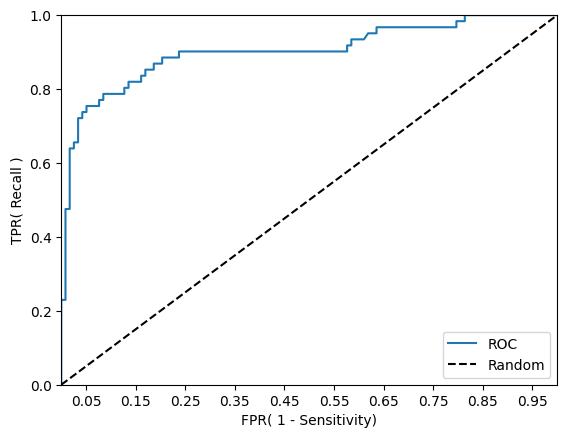

In [78]:
# 그래프 그리기 위한 함수 생성
def roc_curve_plot(y_test, pred_proba_c1) :
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')

    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    # FPR X축의 Scale을 0, 1 단위로 변경, X, Y 축명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity)')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [74]:
from sklearn.metrics import roc_auc_score

# pred = lr_clf.predict(X_test)
# roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)

print(f'ROC AUC 값 : {roc_score:.4f}')

ROC AUC 값 : 0.9024
